Found 147 images belonging to 4 classes.


2023-06-23 21:49:45.800652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


19/19 [==============================] - 6s 171ms/step - loss: 0.7067 - accuracy: 0.9388
Test Loss: 0.7067480087280273
Test Accuracy: 0.9387755393981934


2023-06-23 21:49:51.956021: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


19/19 [==============================] - 3s 170ms/step
                precision    recall  f1-score   support

 AppleBlackrot       0.41      0.41      0.41        49
  AppleHealthy       0.25      0.23      0.24        26
     AppleScab       0.36      0.34      0.35        35
Cedarapplerust       0.17      0.19      0.18        37

      accuracy                           0.31       147
     macro avg       0.30      0.29      0.30       147
  weighted avg       0.31      0.31      0.31       147



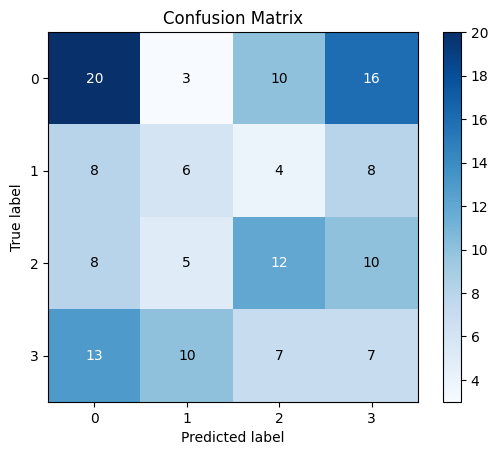

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Load the trained model
model = keras.models.load_model('Apple_Disease_Detection.h5')

# Load the test dataset
test_dir = './valid'
IMG_SIZE = (256, 256)
BATCH_SIZE = 8

test_gen = ImageDataGenerator(rescale=1./255)
test_set = test_gen.flow_from_directory(
    test_dir,
    class_mode='categorical',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# Evaluate the model
loss, accuracy = model.evaluate(test_set)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Generate predictions
predictions = model.predict(test_set)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_set.classes

# Create confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plot_confusion_matrix(true_classes, predicted_classes)

# Classification report
class_labels = test_set.class_indices.keys()
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)
